### Lab | Unsupervised learning intro

#### Getting a database of songs from Spotify

First, I initiate my connection to Spotify API.

In [120]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="1bc14e5e30a44160b7190a4c449b7f8d",
                                                           client_secret="d92e328d86684bc6a23b2d3534353b45"))

Second, I get the tracks for one of my huge playlists.

In [26]:
def get_playlist_tracks(username, playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']

    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    return tracks

In [27]:
tracks = get_playlist_tracks('1119739647', '1UUPBq4KjOS6X7mDEVRvPt')

I check how many songs I have.

In [28]:
print(len(tracks))

3290


The file is too big to print, so I convert it to JSON to examine it.

In [29]:
import json

with open('tracks.json', 'w') as f:
    json.dump(tracks, f, indent=4)

In [30]:
tracks

I now create lists to store the names of the song, artists and their respective ids.

In [ ]:
import pandas as pd

song_names = []
artist_names = []
song_ids = []
artist_ids = []

for track in tracks:
    if track['track'] is None:
        continue
    
    song_names.append(track['track']['name'])
    song_ids.append(track['track']['id'])
    
    artist_names.append(track['track']['artists'][0]['name'])
    artist_ids.append(track['track']['artists'][0]['id'])

I create a dataframe with those lists.

In [32]:
data = {
    'song_name': song_names,
    'artist_name': artist_names,
    'song_id': song_ids,
    'artist_id': artist_ids
}

In [33]:
df = pd.DataFrame(data)
df

,song_name,artist_name,song_id,artist_id
0,One Week,Venom Is Bliss,1Ykhi4Cz7KFodDB9goiurk,2JKC6GoQgJGCaGLwAcmBaH
1,Roses,The Chainsmokers,3vv9phIu6Y1vX3jcqaGz5Z,69GGBxA162lTqCwzJG5jLp
2,Warm,SG Lewis,1BgSJnoM44sIin6ESsZMkP,0GG2cWaonE4JPrjcCCQ1EG
3,This Stage Is Your Life,A Silent Film,1TUShkMcJFI32SwpMWWN9l,7HO5HS3yeokRBGVC4nSKIb
4,I'm Good,The Mowgli's,0YsX1Thbt24s1XP68RMTHM,6AGUQK1EWK6nvN4pLIDQDQ
...,...,...,...,...
3284,Comedown,Joesef,2EjgVZre5ONvZLNw59kEIn,28EyduqESEOVMO6vglvaUZ
3285,Sogni di R&R,Ligabue,6VdEQljDsj3gqY33FDqlLS,7H8ZC8uHJMPZGLMApRRNIz
3286,Through The Echoes,Paolo Nutini,13KhcUWu9WucFw0h5jB88R,7x5rK9BClDQ8wmCkYAGsQp
3287,A Semente,Bezerra Da Silva,7mKFzy9cFV6fbIIVD3rSp9,3aqtJPuhfwxQ60jG1OAFQt


I got the audio features from https://developer.spotify.com/documentation/web-api/reference/get-audio-features, request them for each song id, store them in a list and then added them to my dataframe.

In [35]:
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []

for song_id in df['song_id']:
    audio_features = sp.audio_features(song_id)[0] 
    danceability.append(audio_features['danceability'])
    energy.append(audio_features['energy'])
    key.append(audio_features['key'])
    loudness.append(audio_features['loudness'])
    mode.append(audio_features['mode'])
    speechiness.append(audio_features['speechiness'])
    acousticness.append(audio_features['acousticness'])
    instrumentalness.append(audio_features['instrumentalness'])
    liveness.append(audio_features['liveness'])
    valence.append(audio_features['valence'])
    tempo.append(audio_features['tempo'])

df['danceability'] = danceability
df['energy'] = energy
df['key'] = key
df['loudness'] = loudness
df['mode'] = mode
df['speechiness'] = speechiness
df['acousticness'] = acousticness
df['instrumentalness'] = instrumentalness
df['liveness'] = liveness
df['valence'] = valence
df['tempo'] = tempo

df

,song_name,artist_name,song_id,artist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,One Week,Venom Is Bliss,1Ykhi4Cz7KFodDB9goiurk,2JKC6GoQgJGCaGLwAcmBaH,0.537,0.669,5,-5.797,1,0.0337,0.115000,0.000001,0.1380,0.293,123.891
1,Roses,The Chainsmokers,3vv9phIu6Y1vX3jcqaGz5Z,69GGBxA162lTqCwzJG5jLp,0.713,0.802,4,-7.055,1,0.0561,0.043500,0.003770,0.3090,0.343,100.001
2,Warm,SG Lewis,1BgSJnoM44sIin6ESsZMkP,0GG2cWaonE4JPrjcCCQ1EG,0.466,0.460,11,-13.928,0,0.0849,0.518000,0.393000,0.1030,0.234,96.948
3,This Stage Is Your Life,A Silent Film,1TUShkMcJFI32SwpMWWN9l,7HO5HS3yeokRBGVC4nSKIb,0.492,0.863,4,-5.129,0,0.0371,0.000555,0.038700,0.0863,0.479,134.991
4,I'm Good,The Mowgli's,0YsX1Thbt24s1XP68RMTHM,6AGUQK1EWK6nvN4pLIDQDQ,0.616,0.927,9,-5.235,0,0.0706,0.008660,0.000000,0.1550,0.619,96.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,Comedown,Joesef,2EjgVZre5ONvZLNw59kEIn,28EyduqESEOVMO6vglvaUZ,0.451,0.268,9,-9.832,1,0.0294,0.831000,0.000066,0.0830,0.206,89.513
3285,Sogni di R&R,Ligabue,6VdEQljDsj3gqY33FDqlLS,7H8ZC8uHJMPZGLMApRRNIz,0.507,0.605,7,-4.666,1,0.0333,0.614000,0.000000,0.1090,0.432,171.657
3286,Through The Echoes,Paolo Nutini,13KhcUWu9WucFw0h5jB88R,7x5rK9BClDQ8wmCkYAGsQp,0.730,0.487,7,-7.679,1,0.0399,0.285000,0.000035,0.1350,0.314,104.933
3287,A Semente,Bezerra Da Silva,7mKFzy9cFV6fbIIVD3rSp9,3aqtJPuhfwxQ60jG1OAFQt,0.670,0.557,2,-11.252,1,0.1590,0.413000,0.000000,0.0888,0.875,100.933


In [36]:
df['hit'] = 0
df

,song_name,artist_name,song_id,artist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,One Week,Venom Is Bliss,1Ykhi4Cz7KFodDB9goiurk,2JKC6GoQgJGCaGLwAcmBaH,0.537,0.669,5,-5.797,1,0.0337,0.115000,0.000001,0.1380,0.293,123.891,0
1,Roses,The Chainsmokers,3vv9phIu6Y1vX3jcqaGz5Z,69GGBxA162lTqCwzJG5jLp,0.713,0.802,4,-7.055,1,0.0561,0.043500,0.003770,0.3090,0.343,100.001,0
2,Warm,SG Lewis,1BgSJnoM44sIin6ESsZMkP,0GG2cWaonE4JPrjcCCQ1EG,0.466,0.460,11,-13.928,0,0.0849,0.518000,0.393000,0.1030,0.234,96.948,0
3,This Stage Is Your Life,A Silent Film,1TUShkMcJFI32SwpMWWN9l,7HO5HS3yeokRBGVC4nSKIb,0.492,0.863,4,-5.129,0,0.0371,0.000555,0.038700,0.0863,0.479,134.991,0
4,I'm Good,The Mowgli's,0YsX1Thbt24s1XP68RMTHM,6AGUQK1EWK6nvN4pLIDQDQ,0.616,0.927,9,-5.235,0,0.0706,0.008660,0.000000,0.1550,0.619,96.033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,Comedown,Joesef,2EjgVZre5ONvZLNw59kEIn,28EyduqESEOVMO6vglvaUZ,0.451,0.268,9,-9.832,1,0.0294,0.831000,0.000066,0.0830,0.206,89.513,0
3285,Sogni di R&R,Ligabue,6VdEQljDsj3gqY33FDqlLS,7H8ZC8uHJMPZGLMApRRNIz,0.507,0.605,7,-4.666,1,0.0333,0.614000,0.000000,0.1090,0.432,171.657,0
3286,Through The Echoes,Paolo Nutini,13KhcUWu9WucFw0h5jB88R,7x5rK9BClDQ8wmCkYAGsQp,0.730,0.487,7,-7.679,1,0.0399,0.285000,0.000035,0.1350,0.314,104.933,0
3287,A Semente,Bezerra Da Silva,7mKFzy9cFV6fbIIVD3rSp9,3aqtJPuhfwxQ60jG1OAFQt,0.670,0.557,2,-11.252,1,0.1590,0.413000,0.000000,0.0888,0.875,100.933,0


#### Scraping Billboard's Top 100 songs

In [37]:
import requests
import bs4

url = 'https://www.billboard.com/charts/hot-100/'
res = requests.get(url)
soup = bs4.BeautifulSoup(res.text)

data = []

for e in soup.find_all(attrs={'class':'o-chart-results-list-row-container'}):
    data.append({
        'title':e.h3.get_text(strip=True),
        'author':e.h3.find_next('span').get_text(strip=True)
    })

data

[{'title': 'Last Night', 'author': 'Morgan Wallen'},
 {'title': 'Fast Car', 'author': 'Luke Combs'},
 {'title': 'Calm Down', 'author': 'Rema & Selena Gomez'},
 {'title': 'Flowers', 'author': 'Miley Cyrus'},
 {'title': 'All My Life', 'author': 'Lil Durk Featuring J. Cole'},
 {'title': 'Favorite Song', 'author': 'Toosii'},
 {'title': 'Karma', 'author': 'Taylor Swift Featuring Ice Spice'},
 {'title': 'Kill Bill', 'author': 'SZA'},
 {'title': "Creepin'", 'author': 'Metro Boomin, The Weeknd & 21 Savage'},
 {'title': 'Ella Baila Sola', 'author': 'Eslabon Armado X Peso Pluma'},
 {'title': 'Sure Thing', 'author': 'Miguel'},
 {'title': 'Anti-Hero', 'author': 'Taylor Swift'},
 {'title': 'Snooze', 'author': 'SZA'},
 {'title': 'Something In The Orange', 'author': 'Zach Bryan'},
 {'title': 'Die For You', 'author': 'The Weeknd & Ariana Grande'},
 {'title': 'Fukumean', 'author': 'Gunna'},
 {'title': 'Need A Favor', 'author': 'Jelly Roll'},
 {'title': 'Cruel Summer', 'author': 'Taylor Swift'},
 {'titl

In [39]:
df_scraped = pd.DataFrame(data)

df_scraped

,title,author
0,Last Night,Morgan Wallen
1,Fast Car,Luke Combs
2,Calm Down,Rema & Selena Gomez
3,Flowers,Miley Cyrus
4,All My Life,Lil Durk Featuring J. Cole
...,...,...
95,"Angel, Pt. 1","Kodak Black, NLE Choppa, Jimin, JVKE & Muni Long"
96,Girl In Mine,Parmalee
97,Moonlight,Kali Uchis
98,Classy 101,Feid x Young Miko


Now I get the Spotify track_id to be able to call the features

In [42]:
for index, row in df_scraped.iterrows():
    query = row['title'] + ' ' + row['author']
    result = sp.search(q=query, limit=1, type='track')

    if result['tracks']['items']:
        track = result['tracks']['items'][0]
        
        track_id = track['id']
        artist_id = track['artists'][0]['id']
        
        df_scraped.loc[index, 'track_id'] = track_id
        df_scraped.loc[index, 'artist_id'] = artist_id

In [43]:
df_scraped

,title,author,track_id,artist_id
0,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,4oUHIQIBe0LHzYfvXNW4QM
1,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,718COspgdWOnwOFpJHRZHS
2,Calm Down,Rema & Selena Gomez,1s7oOCT8vauUh01PbJD6ps,46pWGuE3dSwY3bMMXGBvVS
3,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,5YGY8feqx7naU7z4HrwZM6
4,All My Life,Lil Durk Featuring J. Cole,6HgWWaMu31KdOpEG5l28BG,3hcs9uc56yIGFCSy9leWe7
...,...,...,...,...
95,"Angel, Pt. 1","Kodak Black, NLE Choppa, Jimin, JVKE & Muni Long",1vvcEHQdaUTvWt0EIUYcFK,46SHBwWsqBkxI7EeeBEQG7
96,Girl In Mine,Parmalee,2DPqR0kuZVjrOF5oxIRYPy,4TshyQDihSYXSWqvclXl3I
97,Moonlight,Kali Uchis,0JmnkIqdlnUzPaf8sqBRs3,1U1el3k54VvEUzo3ybLPlM
98,Classy 101,Feid x Young Miko,6XSqqQIy7Lm7SnwxS4NrGx,2LRoIwlKmHjgvigdNGBHNo


In [44]:
df_scraped.rename(columns={'title': 'song_name', 'author': 'artist_name', 'track_id': 'song_id'}, inplace=True)

Now I call the audio features for the Top 100 songs from Spotify API

In [45]:
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []

for song_id in df_scraped['song_id']:
    audio_features = sp.audio_features(song_id)[0] 
    danceability.append(audio_features['danceability'])
    energy.append(audio_features['energy'])
    key.append(audio_features['key'])
    loudness.append(audio_features['loudness'])
    mode.append(audio_features['mode'])
    speechiness.append(audio_features['speechiness'])
    acousticness.append(audio_features['acousticness'])
    instrumentalness.append(audio_features['instrumentalness'])
    liveness.append(audio_features['liveness'])
    valence.append(audio_features['valence'])
    tempo.append(audio_features['tempo'])

df_scraped['danceability'] = danceability
df_scraped['energy'] = energy
df_scraped['key'] = key
df_scraped['loudness'] = loudness
df_scraped['mode'] = mode
df_scraped['speechiness'] = speechiness
df_scraped['acousticness'] = acousticness
df_scraped['instrumentalness'] = instrumentalness
df_scraped['liveness'] = liveness
df_scraped['valence'] = valence
df_scraped['tempo'] = tempo

df_scraped

,song_name,artist_name,song_id,artist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,4oUHIQIBe0LHzYfvXNW4QM,0.517,0.675,6,-5.382,1,0.0357,0.45900,0.000000,0.1510,0.518,203.853
1,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,718COspgdWOnwOFpJHRZHS,0.712,0.603,8,-5.520,1,0.0262,0.18600,0.000000,0.1150,0.670,97.994
2,Calm Down,Rema & Selena Gomez,1s7oOCT8vauUh01PbJD6ps,46pWGuE3dSwY3bMMXGBvVS,0.799,0.802,11,-5.196,1,0.0371,0.42900,0.001280,0.1710,0.811,107.008
3,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,5YGY8feqx7naU7z4HrwZM6,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.646,117.999
4,All My Life,Lil Durk Featuring J. Cole,6HgWWaMu31KdOpEG5l28BG,3hcs9uc56yIGFCSy9leWe7,0.829,0.436,3,-8.205,1,0.3270,0.15000,0.000000,0.0954,0.693,143.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Angel, Pt. 1","Kodak Black, NLE Choppa, Jimin, JVKE & Muni Long",1vvcEHQdaUTvWt0EIUYcFK,46SHBwWsqBkxI7EeeBEQG7,0.715,0.681,10,-4.250,0,0.1130,0.12900,0.000000,0.1520,0.277,84.924
96,Girl In Mine,Parmalee,2DPqR0kuZVjrOF5oxIRYPy,4TshyQDihSYXSWqvclXl3I,0.459,0.682,8,-4.235,1,0.0464,0.16700,0.000000,0.1100,0.887,201.831
97,Moonlight,Kali Uchis,0JmnkIqdlnUzPaf8sqBRs3,1U1el3k54VvEUzo3ybLPlM,0.642,0.706,7,-6.872,0,0.0520,0.51800,0.000000,0.2500,0.896,136.851
98,Classy 101,Feid x Young Miko,6XSqqQIy7Lm7SnwxS4NrGx,2LRoIwlKmHjgvigdNGBHNo,0.859,0.658,11,-4.790,1,0.1590,0.14500,0.000000,0.1200,0.672,100.065


I add a column to identify the Top 100 songs, so that if a user selects one of these I can recommend the closest song among these

In [46]:
df_scraped['hit'] = 1

In [47]:
df_scraped

,song_name,artist_name,song_id,artist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,4oUHIQIBe0LHzYfvXNW4QM,0.517,0.675,6,-5.382,1,0.0357,0.45900,0.000000,0.1510,0.518,203.853,1
1,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,718COspgdWOnwOFpJHRZHS,0.712,0.603,8,-5.520,1,0.0262,0.18600,0.000000,0.1150,0.670,97.994,1
2,Calm Down,Rema & Selena Gomez,1s7oOCT8vauUh01PbJD6ps,46pWGuE3dSwY3bMMXGBvVS,0.799,0.802,11,-5.196,1,0.0371,0.42900,0.001280,0.1710,0.811,107.008,1
3,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,5YGY8feqx7naU7z4HrwZM6,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.646,117.999,1
4,All My Life,Lil Durk Featuring J. Cole,6HgWWaMu31KdOpEG5l28BG,3hcs9uc56yIGFCSy9leWe7,0.829,0.436,3,-8.205,1,0.3270,0.15000,0.000000,0.0954,0.693,143.031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Angel, Pt. 1","Kodak Black, NLE Choppa, Jimin, JVKE & Muni Long",1vvcEHQdaUTvWt0EIUYcFK,46SHBwWsqBkxI7EeeBEQG7,0.715,0.681,10,-4.250,0,0.1130,0.12900,0.000000,0.1520,0.277,84.924,1
96,Girl In Mine,Parmalee,2DPqR0kuZVjrOF5oxIRYPy,4TshyQDihSYXSWqvclXl3I,0.459,0.682,8,-4.235,1,0.0464,0.16700,0.000000,0.1100,0.887,201.831,1
97,Moonlight,Kali Uchis,0JmnkIqdlnUzPaf8sqBRs3,1U1el3k54VvEUzo3ybLPlM,0.642,0.706,7,-6.872,0,0.0520,0.51800,0.000000,0.2500,0.896,136.851,1
98,Classy 101,Feid x Young Miko,6XSqqQIy7Lm7SnwxS4NrGx,2LRoIwlKmHjgvigdNGBHNo,0.859,0.658,11,-4.790,1,0.1590,0.14500,0.000000,0.1200,0.672,100.065,1


#### Merging the two dataframes to get all the data

In [75]:
df.columns

Index(['song_name', 'artist_name', 'song_id', 'artist_id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'hit'],
      dtype='object')

In [76]:
df_scraped.columns

Index(['song_name', 'artist_name', 'song_id', 'artist_id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'hit'],
      dtype='object')

In [69]:
data = pd.concat([df, df_scraped], ignore_index=True)

In [49]:
data

,song_name,artist_name,song_id,artist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,One Week,Venom Is Bliss,1Ykhi4Cz7KFodDB9goiurk,2JKC6GoQgJGCaGLwAcmBaH,0.537,0.669,5,-5.797,1,0.0337,0.115000,0.000001,0.1380,0.293,123.891,0
1,Roses,The Chainsmokers,3vv9phIu6Y1vX3jcqaGz5Z,69GGBxA162lTqCwzJG5jLp,0.713,0.802,4,-7.055,1,0.0561,0.043500,0.003770,0.3090,0.343,100.001,0
2,Warm,SG Lewis,1BgSJnoM44sIin6ESsZMkP,0GG2cWaonE4JPrjcCCQ1EG,0.466,0.460,11,-13.928,0,0.0849,0.518000,0.393000,0.1030,0.234,96.948,0
3,This Stage Is Your Life,A Silent Film,1TUShkMcJFI32SwpMWWN9l,7HO5HS3yeokRBGVC4nSKIb,0.492,0.863,4,-5.129,0,0.0371,0.000555,0.038700,0.0863,0.479,134.991,0
4,I'm Good,The Mowgli's,0YsX1Thbt24s1XP68RMTHM,6AGUQK1EWK6nvN4pLIDQDQ,0.616,0.927,9,-5.235,0,0.0706,0.008660,0.000000,0.1550,0.619,96.033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,"Angel, Pt. 1","Kodak Black, NLE Choppa, Jimin, JVKE & Muni Long",1vvcEHQdaUTvWt0EIUYcFK,46SHBwWsqBkxI7EeeBEQG7,0.715,0.681,10,-4.250,0,0.1130,0.129000,0.000000,0.1520,0.277,84.924,1
3385,Girl In Mine,Parmalee,2DPqR0kuZVjrOF5oxIRYPy,4TshyQDihSYXSWqvclXl3I,0.459,0.682,8,-4.235,1,0.0464,0.167000,0.000000,0.1100,0.887,201.831,1
3386,Moonlight,Kali Uchis,0JmnkIqdlnUzPaf8sqBRs3,1U1el3k54VvEUzo3ybLPlM,0.642,0.706,7,-6.872,0,0.0520,0.518000,0.000000,0.2500,0.896,136.851,1
3387,Classy 101,Feid x Young Miko,6XSqqQIy7Lm7SnwxS4NrGx,2LRoIwlKmHjgvigdNGBHNo,0.859,0.658,11,-4.790,1,0.1590,0.145000,0.000000,0.1200,0.672,100.065,1


#### Getting more data as the kmeans model was not performing well

In [50]:
more_data = pd.read_csv('data.csv')
more_data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


Checking for NANs

In [51]:
nan_counts = more_data.isna().sum()
print(nan_counts)

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64


In [ ]:
data.columns

In [54]:
more_data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

On the below cells we change the names of the columns and reorder them to concat more_data with data

In [56]:
more_data.rename(columns={'name': 'song_name', 'artists': 'artist_name', 'track_id': 'song_id'}, inplace=True)

In [57]:
more_data.columns

Index(['acousticness', 'artist_name', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'song_name', 'popularity', 'release_date', 'speechiness',
       'tempo', 'valence', 'year'],
      dtype='object')

In [58]:
columns_to_drop = ['duration_ms', 'explicit', 'id', 'popularity', 'release_date', 'year']
more_data = more_data.drop(columns=columns_to_drop)

In [59]:
more_data.columns

Index(['acousticness', 'artist_name', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'song_name',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

Similar as above, we add a hit columns to identify the Top 100 from the no top 100 columns

In [60]:
more_data['hit'] = 0
more_data

,acousticness,artist_name,danceability,energy,instrumentalness,key,liveness,loudness,mode,song_name,speechiness,tempo,valence,hit
0,0.9950,['Carl Woitschach'],0.708,0.1950,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0.0506,118.469,0.7790,0
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,0.0135,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0.0462,83.972,0.0767,0
2,0.6040,['Seweryn Goszczyński'],0.749,0.2200,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0.9290,107.177,0.8800,0
3,0.9950,['Francisco Canaro'],0.781,0.1300,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0926,108.003,0.7200,0
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,0.2040,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.0424,62.149,0.0693,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,0.4430,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,0.1430,100.012,0.3060,0
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,0.3850,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),0.0403,128.000,0.2700,0
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,0.5390,0.002330,7,0.1080,-9.332,1,How Would I Know,0.1050,123.700,0.1530,0
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,0.7610,0.000000,1,0.2220,-2.557,1,I Found You,0.0385,129.916,0.4720,0


We clean up the artist_name column

In [66]:
more_data['artist_name'] = more_data['artist_name'].apply(lambda x: x[1:-1].replace("''", ""))

In [67]:
more_data

,acousticness,artist_name,danceability,energy,instrumentalness,key,liveness,loudness,mode,song_name,speechiness,tempo,valence,hit
0,0.9950,Carl Woitschach,0.708,0.1950,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0.0506,118.469,0.7790,0
1,0.9940,Robert SchumannVladimir Horowitz,0.379,0.0135,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0.0462,83.972,0.0767,0
2,0.6040,Seweryn Goszczyński,0.749,0.2200,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0.9290,107.177,0.8800,0
3,0.9950,Francisco Canaro,0.781,0.1300,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0926,108.003,0.7200,0
4,0.9900,Frédéric ChopinVladimir Horowitz,0.210,0.2040,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.0424,62.149,0.0693,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,DripReportTyga,0.875,0.4430,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,0.1430,100.012,0.3060,0
169905,0.0167,Leon BridgesTerrace Martin,0.719,0.3850,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),0.0403,128.000,0.2700,0
169906,0.5380,KygoOh Wonder,0.514,0.5390,0.002330,7,0.1080,-9.332,1,How Would I Know,0.1050,123.700,0.1530,0
169907,0.0714,Cash CashAndy Grammer,0.646,0.7610,0.000000,1,0.2220,-2.557,1,I Found You,0.0385,129.916,0.4720,0


#### Finally, we merge all data sources to get all of our data

In [61]:
data

,song_name,artist_name,song_id,artist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,One Week,Venom Is Bliss,1Ykhi4Cz7KFodDB9goiurk,2JKC6GoQgJGCaGLwAcmBaH,0.537,0.669,5,-5.797,1,0.0337,0.115000,0.000001,0.1380,0.293,123.891,0
1,Roses,The Chainsmokers,3vv9phIu6Y1vX3jcqaGz5Z,69GGBxA162lTqCwzJG5jLp,0.713,0.802,4,-7.055,1,0.0561,0.043500,0.003770,0.3090,0.343,100.001,0
2,Warm,SG Lewis,1BgSJnoM44sIin6ESsZMkP,0GG2cWaonE4JPrjcCCQ1EG,0.466,0.460,11,-13.928,0,0.0849,0.518000,0.393000,0.1030,0.234,96.948,0
3,This Stage Is Your Life,A Silent Film,1TUShkMcJFI32SwpMWWN9l,7HO5HS3yeokRBGVC4nSKIb,0.492,0.863,4,-5.129,0,0.0371,0.000555,0.038700,0.0863,0.479,134.991,0
4,I'm Good,The Mowgli's,0YsX1Thbt24s1XP68RMTHM,6AGUQK1EWK6nvN4pLIDQDQ,0.616,0.927,9,-5.235,0,0.0706,0.008660,0.000000,0.1550,0.619,96.033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,"Angel, Pt. 1","Kodak Black, NLE Choppa, Jimin, JVKE & Muni Long",1vvcEHQdaUTvWt0EIUYcFK,46SHBwWsqBkxI7EeeBEQG7,0.715,0.681,10,-4.250,0,0.1130,0.129000,0.000000,0.1520,0.277,84.924,1
3385,Girl In Mine,Parmalee,2DPqR0kuZVjrOF5oxIRYPy,4TshyQDihSYXSWqvclXl3I,0.459,0.682,8,-4.235,1,0.0464,0.167000,0.000000,0.1100,0.887,201.831,1
3386,Moonlight,Kali Uchis,0JmnkIqdlnUzPaf8sqBRs3,1U1el3k54VvEUzo3ybLPlM,0.642,0.706,7,-6.872,0,0.0520,0.518000,0.000000,0.2500,0.896,136.851,1
3387,Classy 101,Feid x Young Miko,6XSqqQIy7Lm7SnwxS4NrGx,2LRoIwlKmHjgvigdNGBHNo,0.859,0.658,11,-4.790,1,0.1590,0.145000,0.000000,0.1200,0.672,100.065,1


In [55]:
data.columns

Index(['song_name', 'artist_name', 'song_id', 'artist_id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'hit'],
      dtype='object')

In [71]:
columns_to_drop = ['artist_id', 'song_id']
data = data.drop(columns=columns_to_drop)

In [72]:
data

,song_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,One Week,Venom Is Bliss,0.537,0.669,5,-5.797,1,0.0337,0.115000,0.000001,0.1380,0.293,123.891,0
1,Roses,The Chainsmokers,0.713,0.802,4,-7.055,1,0.0561,0.043500,0.003770,0.3090,0.343,100.001,0
2,Warm,SG Lewis,0.466,0.460,11,-13.928,0,0.0849,0.518000,0.393000,0.1030,0.234,96.948,0
3,This Stage Is Your Life,A Silent Film,0.492,0.863,4,-5.129,0,0.0371,0.000555,0.038700,0.0863,0.479,134.991,0
4,I'm Good,The Mowgli's,0.616,0.927,9,-5.235,0,0.0706,0.008660,0.000000,0.1550,0.619,96.033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,"Angel, Pt. 1","Kodak Black, NLE Choppa, Jimin, JVKE & Muni Long",0.715,0.681,10,-4.250,0,0.1130,0.129000,0.000000,0.1520,0.277,84.924,1
3385,Girl In Mine,Parmalee,0.459,0.682,8,-4.235,1,0.0464,0.167000,0.000000,0.1100,0.887,201.831,1
3386,Moonlight,Kali Uchis,0.642,0.706,7,-6.872,0,0.0520,0.518000,0.000000,0.2500,0.896,136.851,1
3387,Classy 101,Feid x Young Miko,0.859,0.658,11,-4.790,1,0.1590,0.145000,0.000000,0.1200,0.672,100.065,1


We concat the two dataframes we have worked on

In [74]:
more_data = more_data[data.columns]
data = pd.concat([data, more_data], ignore_index=True)
data

,song_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,One Week,Venom Is Bliss,0.537,0.669,5,-5.797,1,0.0337,0.115000,0.000001,0.1380,0.293,123.891,0
1,Roses,The Chainsmokers,0.713,0.802,4,-7.055,1,0.0561,0.043500,0.003770,0.3090,0.343,100.001,0
2,Warm,SG Lewis,0.466,0.460,11,-13.928,0,0.0849,0.518000,0.393000,0.1030,0.234,96.948,0
3,This Stage Is Your Life,A Silent Film,0.492,0.863,4,-5.129,0,0.0371,0.000555,0.038700,0.0863,0.479,134.991,0
4,I'm Good,The Mowgli's,0.616,0.927,9,-5.235,0,0.0706,0.008660,0.000000,0.1550,0.619,96.033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173293,Skechers (feat. Tyga) - Remix,DripReportTyga,0.875,0.443,1,-7.461,1,0.1430,0.173000,0.000032,0.0891,0.306,100.012,0
173294,Sweeter (feat. Terrace Martin),Leon BridgesTerrace Martin,0.719,0.385,8,-10.907,1,0.0403,0.016700,0.031300,0.1110,0.270,128.000,0
173295,How Would I Know,KygoOh Wonder,0.514,0.539,7,-9.332,1,0.1050,0.538000,0.002330,0.1080,0.153,123.700,0
173296,I Found You,Cash CashAndy Grammer,0.646,0.761,1,-2.557,1,0.0385,0.071400,0.000000,0.2220,0.472,129.916,0


#### Running the model kmeans model

In [77]:
x = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [78]:
x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.537,0.669,5,-5.797,1,0.0337,0.115000,0.000001,0.1380,0.293,123.891
1,0.713,0.802,4,-7.055,1,0.0561,0.043500,0.003770,0.3090,0.343,100.001
2,0.466,0.460,11,-13.928,0,0.0849,0.518000,0.393000,0.1030,0.234,96.948
3,0.492,0.863,4,-5.129,0,0.0371,0.000555,0.038700,0.0863,0.479,134.991
4,0.616,0.927,9,-5.235,0,0.0706,0.008660,0.000000,0.1550,0.619,96.033
...,...,...,...,...,...,...,...,...,...,...,...
173293,0.875,0.443,1,-7.461,1,0.1430,0.173000,0.000032,0.0891,0.306,100.012
173294,0.719,0.385,8,-10.907,1,0.0403,0.016700,0.031300,0.1110,0.270,128.000
173295,0.514,0.539,7,-9.332,1,0.1050,0.538000,0.002330,0.1080,0.153,123.700
173296,0.646,0.761,1,-2.557,1,0.0385,0.071400,0.000000,0.2220,0.472,129.916


We standardise the data for kmeans

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [91]:
x_scaled

array([[-0.01544075,  0.67399298, -0.05710909, ..., -0.38548158,
        -0.9057529 ,  0.2275071 ],
       [ 0.98867827,  1.17346339, -0.34146985, ...,  0.58520089,
        -0.71503941, -0.55102053],
       [-0.42051149, -0.11088909,  1.64905544, ..., -0.58415928,
        -1.13079482, -0.65051174],
       ...,
       [-0.14666085,  0.18578882,  0.51161242, ..., -0.55577676,
        -1.43975068,  0.22128279],
       [ 0.60642842,  1.01949131, -1.19455212, ...,  0.0913449 ,
        -0.2229986 ,  0.42384988],
       [-0.15807129, -0.23106243, -1.47891287, ..., -0.57280627,
        -0.6273112 , -1.18365164]])

We train the kmeans model, we have played around with the hyperparameters

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=200, random_state=42)
kmeans.fit(x_scaled)
clusters = kmeans.predict(x_scaled)

We plot the inertia against the number of clusters to find the elbow

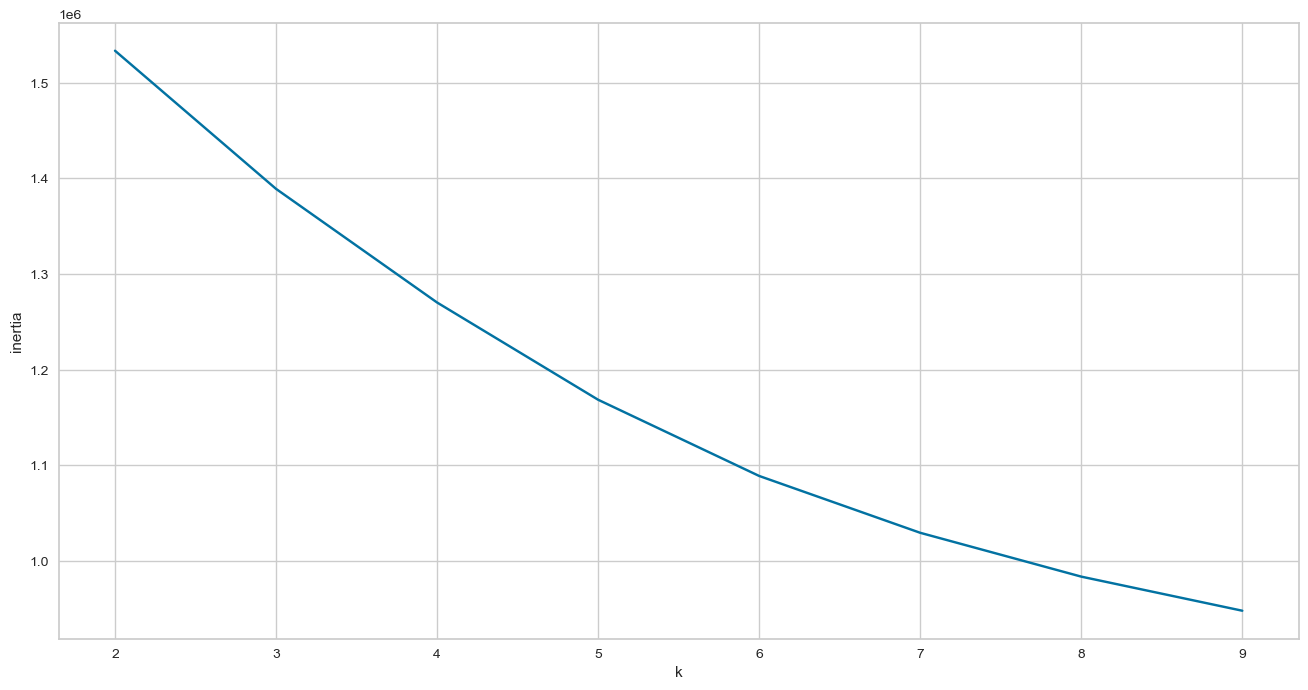

In [93]:
import numpy as np

K = range(2, 10)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=200, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

inertia
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

Given that it was not clear on the previous chart, we use elbow visualizer to find the optimal k

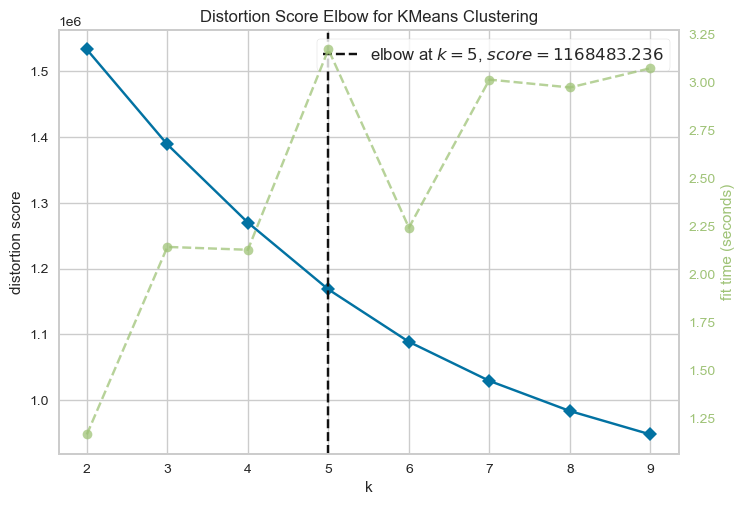

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(x_scaled) 
visualizer.poof() 

We can see that our silhouette score is still very low

In [95]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_scaled, kmeans.labels_, metric='euclidean') #Calculate Silhoutte Score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.142


We use Silhouette Visualizer to compare different k's

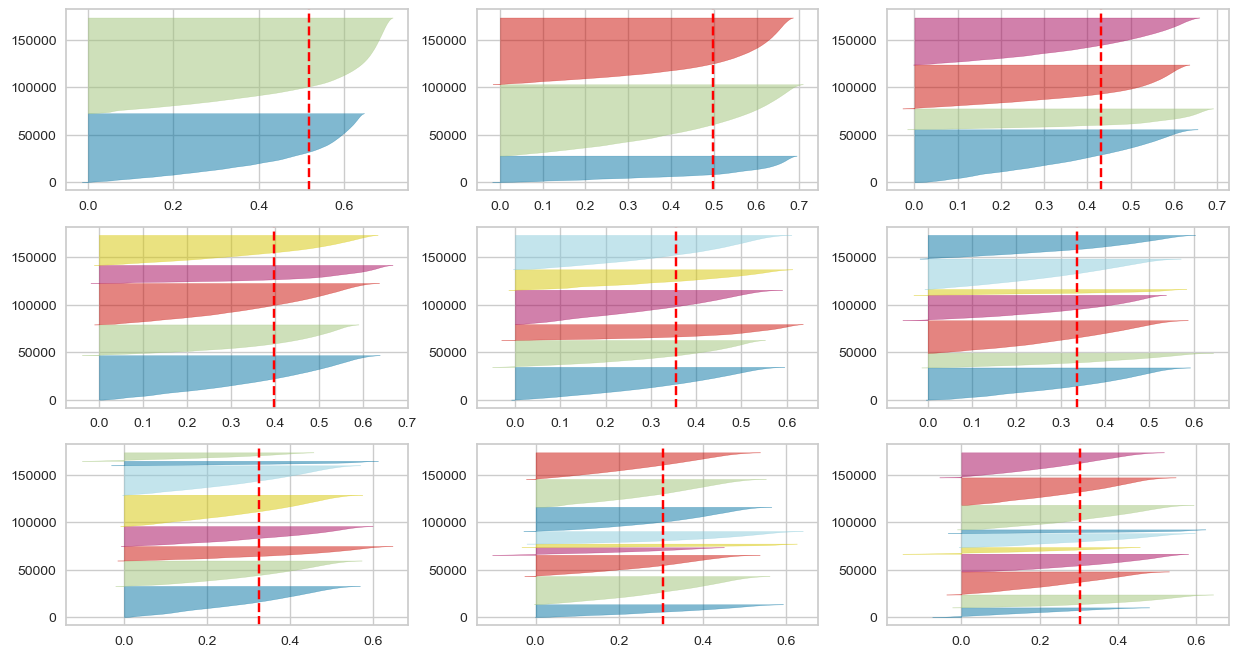

In [96]:
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15, 8))
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=200, random_state=42)
    q, mod = divmod(i-2, 3)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(x)

#### Trying dimensionality reduction to see if it improves kmeans performance

In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
x_pca = pca.fit_transform(x_scaled)

kmeans.fit(x_pca)

score_pca = silhouette_score(x_pca, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score_pca)

Silhouette Score: 0.163


To optimise PCA, we check the variance explained by each number of components, aiming at achieving 95% explainability

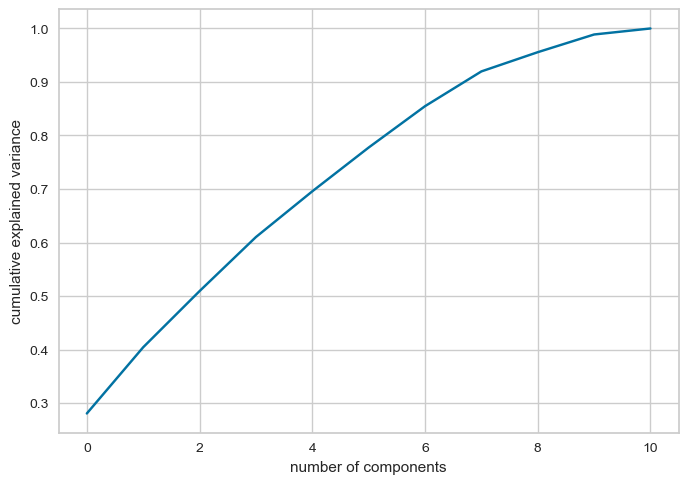

In [98]:
pca = PCA().fit(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Even after dimensionality reduction, our Silhouette score is low

#### Trying DBSCAN for density based clustering to see if it performs better than kmeans

We train the DBSCAN model (we have optimised the hyperparameters below).

In [111]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=4)
clusters = dbscan.fit_predict(x_scaled)

The entries in cluster -1 have been considered as outliers, so we create a mask to ignore them

In [112]:
mask = clusters != -1
clusters_no_noise = clusters[mask]
x_no_noise = x_scaled[mask]

score_db = silhouette_score(x_no_noise, clusters_no_noise, metric='euclidean')

print('Silhouette Score: %.3f' % score_db)

Silhouette Score: 0.996


We plot the k distance graph to find the optimal EPS

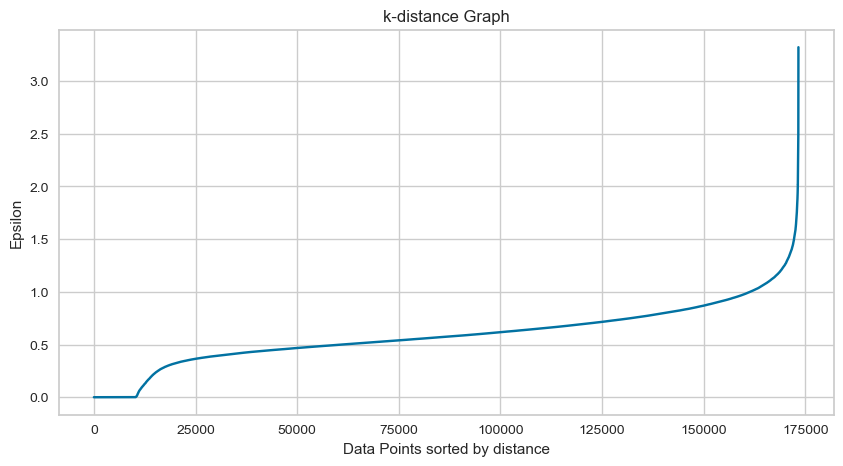

In [102]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = 4

nearest_neighbors = NearestNeighbors(n_neighbors=neighbors)
nearest_neighbors_fit = nearest_neighbors.fit(x_scaled)
distances, indices = nearest_neighbors_fit.kneighbors(x_scaled)

distances = np.sort(distances, axis=0)[:, 1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

These are out clusters

In [114]:
clusters_no_noise

array([ 0,  1,  2,  3,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 14,
       10,  7, 15, 16, 11, 17, 17, 18, 19, 20, 21, 22, 22, 23,  6,  9, 19,
       24, 20,  3, 25,  0, 26, 23, 27, 28, 29, 30, 31, 31, 31, 12, 17,  5,
       24, 32, 33, 32, 32, 34, 35, 36, 37, 27, 29, 38, 30, 31, 21, 34, 26,
       39, 40, 41, 42, 43, 14, 44, 45, 45, 45, 45, 45, 26, 34, 30, 32, 40,
       22,  6,  1, 35, 34, 21, 36,  8, 23, 37, 42, 40, 46, 40, 47, 47, 40,
       39, 11, 19, 36, 43,  2, 48, 16,  6,  5,  8, 12, 17,  9, 18, 22, 13,
       49, 50, 46, 10, 19, 38, 28, 41, 24, 29, 27, 37, 43, 14, 20,  4,  4,
        3,  2, 44, 47, 44,  0, 51, 15, 11, 23, 42, 49, 25, 51, 40, 33, 48,
       39, 13, 49,  2, 20,  7, 36, 35, 40, 15, 39, 16,  5,  8, 46, 50, 46,
       38, 13, 25, 21, 26, 48, 49,  4, 47, 18, 24, 28, 27, 29, 41, 50, 20,
        0,  7, 51, 51, 32, 40, 16,  6, 37, 43, 28,  1, 25, 33, 40, 18, 50,
       10, 15, 35, 31, 30, 48,  9, 42, 41,  3, 33, 12, 12, 38,  9, 44])

We add them to the dataset

In [115]:
data_no_noise = data[mask]
data_no_noise

,song_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
142,Ophelia,The Lumineers,0.664,0.573,5,-6.519,1,0.0277,0.613000,0.000363,0.0857,0.566,76.023,0
193,We Are The People,Empire of the Sun,0.666,0.785,4,-5.370,0,0.0308,0.098100,0.019800,0.4340,0.549,122.973,0
195,The A Team,Ed Sheeran,0.642,0.289,9,-9.918,1,0.0367,0.669000,0.000000,0.1800,0.407,84.996,0
283,Beautiful,Eminem,0.727,0.696,5,-4.472,0,0.0706,0.251000,0.000000,0.0726,0.467,132.077,0
1060,We Are The People,Empire of the Sun,0.666,0.785,4,-5.370,0,0.0308,0.098100,0.019800,0.4340,0.549,122.973,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168305,Wild Horses - 2009 Mix,The Rolling Stones,0.432,0.389,7,-6.517,1,0.0255,0.687000,0.010700,0.0788,0.158,139.506,0
168388,Wild Horses - 2009 Mix,The Rolling Stones,0.432,0.389,7,-6.517,1,0.0255,0.687000,0.010700,0.0788,0.158,139.506,0
170343,Smells Like Teen Spirit,Nirvana,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,0
171234,Peace Train,Yusuf / Cat Stevens,0.613,0.589,0,-10.388,1,0.0458,0.107000,0.000036,0.1140,0.757,82.376,0


We add the clusters to the final dataframe

In [116]:
data_no_noise['cluster'] = clusters_no_noise

/var/folders/3t/b6508fm16q3_3s3tkz2tb74m0000gn/T/ipykernel_3575/3116284854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_noise['cluster'] = clusters_no_noise


In [117]:
data_no_noise

,song_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit,cluster
142,Ophelia,The Lumineers,0.664,0.573,5,-6.519,1,0.0277,0.613000,0.000363,0.0857,0.566,76.023,0,0
193,We Are The People,Empire of the Sun,0.666,0.785,4,-5.370,0,0.0308,0.098100,0.019800,0.4340,0.549,122.973,0,1
195,The A Team,Ed Sheeran,0.642,0.289,9,-9.918,1,0.0367,0.669000,0.000000,0.1800,0.407,84.996,0,2
283,Beautiful,Eminem,0.727,0.696,5,-4.472,0,0.0706,0.251000,0.000000,0.0726,0.467,132.077,0,3
1060,We Are The People,Empire of the Sun,0.666,0.785,4,-5.370,0,0.0308,0.098100,0.019800,0.4340,0.549,122.973,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168305,Wild Horses - 2009 Mix,The Rolling Stones,0.432,0.389,7,-6.517,1,0.0255,0.687000,0.010700,0.0788,0.158,139.506,0,12
168388,Wild Horses - 2009 Mix,The Rolling Stones,0.432,0.389,7,-6.517,1,0.0255,0.687000,0.010700,0.0788,0.158,139.506,0,12
170343,Smells Like Teen Spirit,Nirvana,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,0,38
171234,Peace Train,Yusuf / Cat Stevens,0.613,0.589,0,-10.388,1,0.0458,0.107000,0.000036,0.1140,0.757,82.376,0,9


We ask the user for a song to predict its cluster and match it to a recommendation

In [ ]:
user_song = input('Choose a song: ')

results = sp.search(q=f'track:{user_song}', limit=1)
track_id = results['tracks']['items'][0]['id']
audio_features = sp.audio_features(track_id)

user_song_df = pd.DataFrame(audio_features)

user_song_df

In [ ]:
from sklearn.metrics import pairwise_distances

user_song_scaled = scaler.transform(user_song_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

user_cluster = dbscan.fit_predict(user_song_scaled)

if user_cluster != -1:
    
    same_cluster_songs = data_no_noise[data_no_noise['cluster'] == user_cluster[0]]
    distances = pairwise_distances(user_song_scaled, same_cluster_songs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])
    index_min_distance = distances.argmin()
    recommended_song = same_cluster_songs.iloc[index_min_distance]
    print(f"We recommend: {recommended_song['song_name']} by {recommended_song['artist_name']}")
    
else:
    print("Couldn't find a close match in our dataset.")